In [6]:
address = 'E:/face_detection.json'

In [2]:
import json
import codecs

In [7]:

jsonData = []

with codecs.open(address, 'rU', 'utf-8') as js:
    for line in js:
        jsonData.append(json.loads(line))

print(f"{len(jsonData)} image found!")

print("Sample row:")

jsonData[0]

409 image found!
Sample row:


{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg',
 'annotation': [{'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
    {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
   'imageWidth': 650,
   'imageHeight': 333},
  {'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
    {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
   'imageWidth': 650,
   'imageHeight': 333}],
 'extras': None}

In [8]:
import requests
from tqdm import tqdm
from PIL import Image
from io import BytesIO

In [10]:
import numpy as np
images = []

for data in tqdm(jsonData):
    response = requests.get(data['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data["annotation"]])

100%|████████████████████████████████████████████████████████████████████████████████| 409/409 [11:00<00:00,  1.61s/it]


In [11]:
!mkdir face-detection-images

In [12]:
import cv2
import time

In [13]:
count = 1

totalfaces = 0

start = time.time()

for image in images:
    img = image[0]
    metadata = image[1]
    for data in metadata:
        height = data['imageHeight']
        width = data['imageWidth']
        points = data['points']
        if 'Face' in data['label']:
            x1 = round(width*points[0]['x'])
            y1 = round(height*points[0]['y'])
            x2 = round(width*points[1]['x'])
            y2 = round(height*points[1]['y'])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
            totalfaces += 1
    cv2.imwrite('./face-detection-images/face_image_{}.jpg'.format(count),img)
    count += 1
    
end = time.time()

print("Total test images with faces : {}".format(len(images)))
print("Sucessfully tested {} images".format(count-1))
print("Execution time in seconds {}".format(end-start))
print("Total Faces Detected {}".format(totalfaces))

Total test images with faces : 409
Sucessfully tested 409 images
Execution time in seconds 20.37924599647522
Total Faces Detected 1132


In [14]:
import matplotlib.pyplot as plt

In [15]:
face1 = cv2.imread("./face-detection-images/face_image_64.jpg")

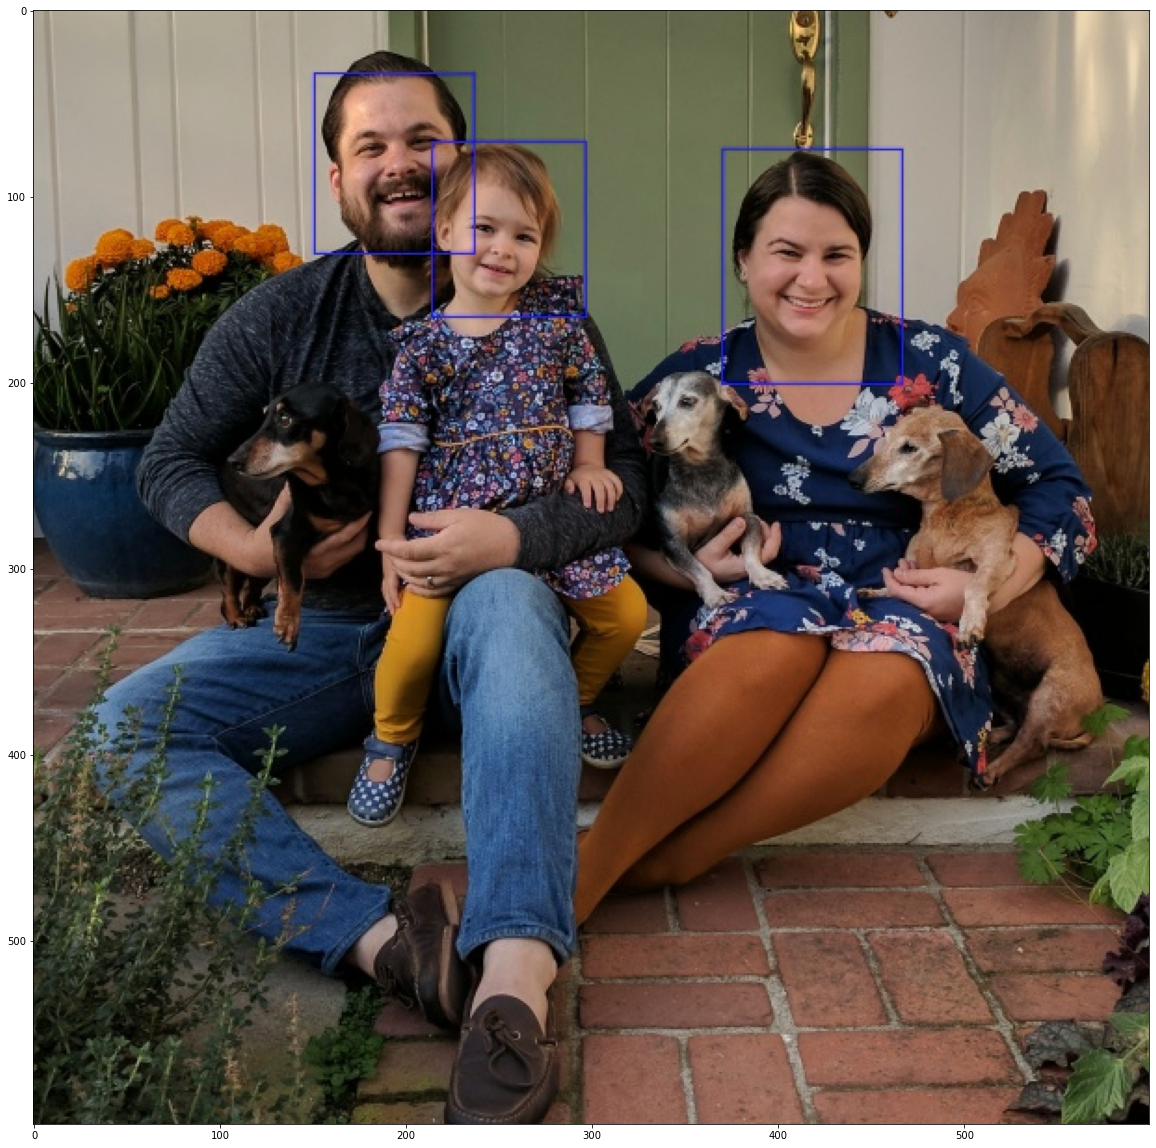

In [16]:
plt.figure(figsize=(20,25))
plt.imshow(face1)
plt.show()

In [19]:
face2 = cv2.imread("./face-detection-images/face_image_200.jpg")

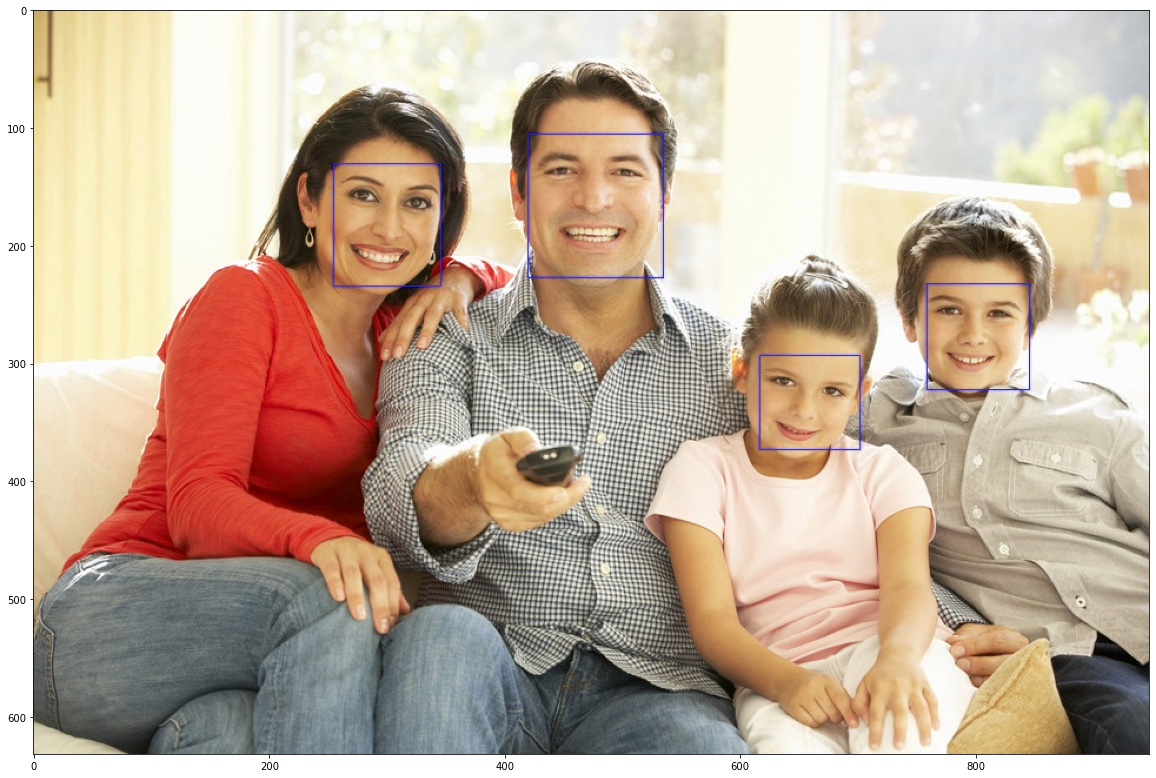

In [20]:
plt.figure(figsize=(20,25))
plt.imshow(face2)
plt.show()